In [1]:
import tensorflow as tf

tf.__version__

'2.9.2'

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df.iloc[:,[3,4,5,6,7,8,9,10,11,13]]
y = df.iloc[:,12]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [7]:
y.head()

0    101348.88
1    112542.58
2    113931.57
3     93826.63
4     79084.10
Name: EstimatedSalary, dtype: float64

In [8]:
## Feature Engineering
geography= pd.get_dummies(X['Geography'], drop_first=True)
gender= pd.get_dummies(X['Gender'], drop_first=True)

In [9]:
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

/var/folders/8c/xhhzc929045973qqkytbdr6h0000gn/T/ipykernel_6753/3635950594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Geography', 'Gender'], axis=1, inplace=True)


In [10]:
X = pd.concat([X,geography, gender], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,0,0,1,0


In [11]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [14]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [32]:
regressor=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(11,),activation='relu' ), # input layer & 1st hidden layer
    tf.keras.layers.Dense(10,activation='relu'), # 2nd hidden layer
    # tf.keras.layers.Dropout(0.2), # bias of the hidden layer
    tf.keras.layers.Dense(10,activation='relu'), # 3rd hidden layer
    # tf.keras.layers.Dropout(0.3), # bias of the hidden layer
    tf.keras.layers.Dense(1, activation='linear') # output layer
])

regressor.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['mean_absolute_error']
)

regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                120       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [42]:
## Early stopping of the training model
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20, 
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,   

)

In [43]:
model_history = regressor.fit(X_train,y_train,validation_split=0.33,batch_size=10, epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 6s 10ms/step - loss: 50434.1836 - mean_absolute_error: 50434.1836 - val_loss: 51285.0547 - val_mean_absolute_error: 51285.0547
Epoch 2/100
536/536 [==============================] - 5s 10ms/step - loss: 50414.0703 - mean_absolute_error: 50414.0703 - val_loss: 50876.0781 - val_mean_absolute_error: 50876.0703
Epoch 3/100
536/536 [==============================] - 5s 10ms/step - loss: 50412.9609 - mean_absolute_error: 50412.9609 - val_loss: 53303.3633 - val_mean_absolute_error: 53303.3594
Epoch 4/100
536/536 [==============================] - 5s 10ms/step - loss: 50495.8242 - mean_absolute_error: 50495.8242 - val_loss: 51042.1367 - val_mean_absolute_error: 51042.1367
Epoch 5/100
536/536 [==============================] - 5s 10ms/step - loss: 50041.4414 - mean_absolute_error: 50041.4414 - val_loss: 50515.5664 - val_mean_absolute_error: 50515.5664
Epoch 6/100
536/536 [==============================] - 5s 10ms/step - loss: 50312.2148 - m

In [35]:
model_history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

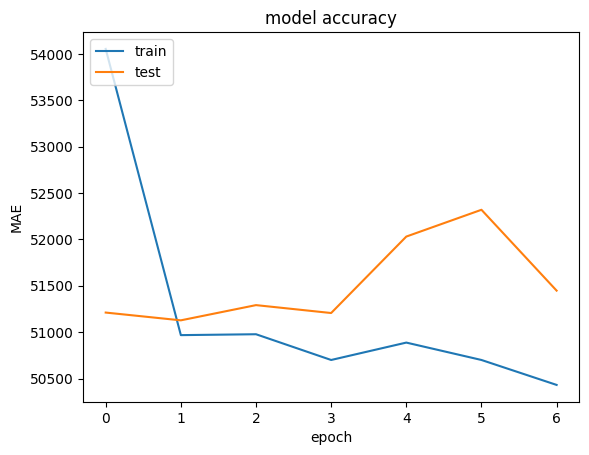

In [36]:
# summarize history for accuracy
plt.plot(model_history.history['mean_absolute_error'])
plt.plot(model_history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

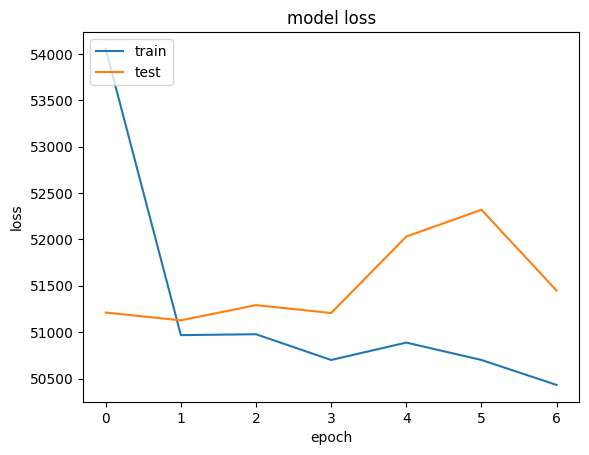

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
y_pred = regressor.predict(X_test)


34/63 [===============>..............] - ETA: 0s

2022-08-21 12:14:10.154091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 5ms/step


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
cm = mean_absolute_error(y_test, y_pred)
cm2 = mean_squared_error(y_test, y_pred, squared=False)
cm,cm2

(50189.695078906254, 59049.83820345687)

In [40]:
# Calculate the Accuracy
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [41]:
score

-14.755677558595263

In [31]:
regressor.get_weights()

[array([[ -0.6926607 ,  -0.19612971,  -0.31391197,   4.272938  ,
          -2.8603406 ,  -3.9196048 ,   3.296409  ,  -0.11181901,
          -3.1169994 ,   2.586101  ],
        [  0.1255754 ,   1.6226299 ,  -4.62201   ,  -2.3599772 ,
          -0.65677863,   0.30541247,   1.760789  ,   2.193911  ,
           1.0741632 ,   0.08748922],
        [ -1.5249668 ,   1.0165504 ,  -0.04626517,  -2.6874368 ,
           1.1052068 ,  -1.3696847 ,   2.3678305 ,   1.576058  ,
           3.1773    ,  -3.3910503 ],
        [  0.2695968 ,  -1.0041533 ,  -2.1043806 ,  -2.433086  ,
           1.7224497 ,   2.773867  ,  -0.31971514,  -0.98106444,
          -0.817815  ,  -0.501289  ],
        [  1.4652858 ,  -0.628988  ,  -1.1645328 ,  -1.922527  ,
          -1.5492986 ,  -2.3342087 ,   2.896852  ,   1.2632731 ,
           2.6336324 ,   2.376551  ],
        [  0.19921549,   3.3602867 ,   0.13846758,  -5.6264143 ,
           1.8270752 ,  -3.2231958 ,  -6.969572  ,   1.0709869 ,
           4.9643593 ,   4.884

In [44]:
#Saving h5 file
regressor.save('reg_model.h5')

In [45]:
#Loading h5 file
reg = tf.keras.models.load_model('reg_model.h5')

In [46]:
reg.predict(X_test)

63/63 [==============================] - 0s 3ms/step


2022-08-21 14:04:27.204602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[96129.31 ],
       [93092.92 ],
       [84482.19 ],
       ...,
       [92906.02 ],
       [82712.02 ],
       [87188.055]], dtype=float32)